<a href="https://colab.research.google.com/github/Shandyree/Pemograman_Python2020/blob/main/Shandy_R%2CTugas_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls

 158680.jpg
 158681.jpg
 159679.jpg
 160381.jpg
 1.pdf
 20200712_123343.jpg
 20200712_123606.jpg
"27.Shandy Ramanda Firmansyach 'Perubahan Damri Dari Masa Ke Masa'.mp4"
'2. Identifier, TIpe Data, Keyword JAVA - FCP.gdoc'
 2.pdf
 AlasPersegiPanjang.java
'Bahan Baju Profesi.rar'
 caleg.cdr
 Classroom/
'Colab Notebooks'/
 dataset@
 Daun.jpg
'File Rocks'/
'GameTebakGambar10 (1).zip'
 GameTebakGambar10.zip
 hitam.psd
 Hitung.java
'ISI REVISI3.docx'
'ISI REVISI3.docx.gdoc'
 JURNAL_MODUL1_18100_1101180133_SHANDY.pdf
'JURNAL_MODUL2_SISKOM-18100_1101180133_Shandy R.pdf'
 JURNAL_MODUL3_SISKOM-18100_1101180133_SHANDY.doc
'kaos RT.cdr'
 kodemandiri_shandy.java
 kuning.psd
 LatShandyR.java
'LH_GELADI2020_1_1101180133_SHANDY RAMANDA F.pdf'
'LH_GELADI2020_5_1101180133_SHANDY RAMANDA F.pdf'
'Meong(dot)Club'/
 merah.psd
 messageImage_1602298831253.jpg
 messageImage_1602903423547.jpg
 model_scene/
'Print film kaos partai belakang.cdr'
'Python Tugas'/
 Quiz1.docx
'Salinan [Anitoki] KnB_LG [720p] [14D705F

In [4]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [7]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [8]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [11]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [12]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

In [14]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
33/33 [==============================] - 2s 67ms/step - loss: 2.4170 - accuracy: 0.1697 - val_loss: 2.2651 - val_accuracy: 0.2358
Epoch 2/25
33/33 [==============================] - 2s 62ms/step - loss: 2.0777 - accuracy: 0.2872 - val_loss: 1.9427 - val_accuracy: 0.3608
Epoch 3/25
33/33 [==============================] - 2s 63ms/step - loss: 1.7371 - accuracy: 0.4076 - val_loss: 1.7216 - val_accuracy: 0.4034
Epoch 4/25
33/33 [==============================] - 2s 63ms/step - loss: 1.4691 - accuracy: 0.5100 - val_loss: 1.5798 - val_accuracy: 0.4773
Epoch 5/25
33/33 [==============================] - 2s 63ms/step - loss: 1.3073 - accuracy: 0.5469 - val_loss: 1.5854 - val_accuracy: 0.4830
Epoch 6/25
33/33 [==============================] - 2s 64ms/step - loss: 1.1498 - accuracy: 0.6114 - val_loss: 1.4031 - val_accuracy: 0.5398
Epoch 7/25
33/33 [==============================] - 2s 64ms/step - loss: 0.9984 - accuracy: 0.6758 - val_loss: 1.3688 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


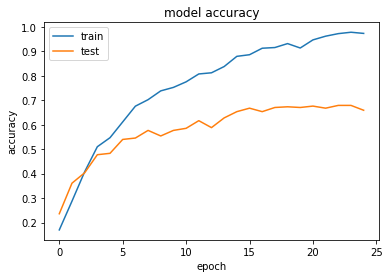

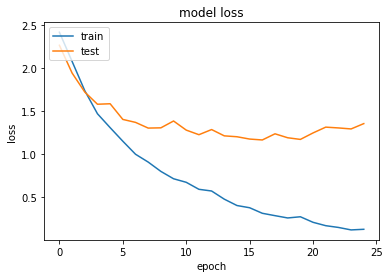

In [15]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)

[INFO] evaluating network...


In [17]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       0.39      0.68      0.50        22
      GMB_02       0.82      0.42      0.56        33
      GMB_03       0.73      0.59      0.66        32
      GMB_04       0.72      0.56      0.63        32
      GMB_05       0.84      0.52      0.64        31
      GMB_06       0.58      0.47      0.52        30
      GMB_07       0.55      0.81      0.66        27
      GMB_08       0.75      0.82      0.78        22
      GMB_09       0.78      0.86      0.82        29
      GMB_10       0.59      0.83      0.69        35
      GMB_11       0.64      0.48      0.55        29
      nonGMB       0.78      0.93      0.85        30

    accuracy                           0.66       352
   macro avg       0.68      0.67      0.65       352
weighted avg       0.69      0.66      0.65       352



In [18]:
model1.save('model_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_scene/assets


In [19]:
import cv2
import matplotlib.pyplot as plt
imagess='Daun.jpg'

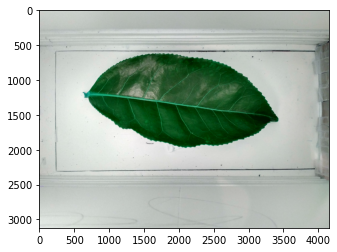

In [20]:
img_array = cv2.imread(imagess)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [21]:
image_testing = Image.open ('Daun.jpg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [22]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [23]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.8023212e-01 2.0607003e-07 6.8422730e-07 1.6106764e-04 3.5868702e-04
  8.1981074e-07 2.6109114e-03 2.4411414e-04 1.4935310e-06 1.3574830e-02
  1.0101406e-03 1.8049311e-03]]
['GMB_01']
